In [2]:
# Example CTD file creator

In [28]:
from oceanograpy.data import ctd
from oceanograpy.data.nc_format import conventionalize

In [30]:
import importlib as imp
imp.reload(conventionalize)
imp.reload(ctd)

<module 'oceanograpy.data.ctd' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/data/ctd.py'>

In [31]:
## Load and join all profiles here

In [32]:
data_dir = '../example_data/cnv/atwain_cruise/'

In [33]:
D = ctd.ctds_from_cnv_dir(data_dir)

Loaded 10 profiles from list of Datasets.
NOTE: It seems the input data already binned -> using preexisting binning.


Joining profiles together:   0%|          | 0/10 [00:00<?, ?it/s]


NOTE: No cruise ID found in the dataset. Remember to assign!
-> ds = .set_ctd_attr(N, "cruise_name").


In [34]:
D

<xarray.Dataset>
Dimensions:             (PRES: 871, TIME: 10)
Coordinates:
  * PRES                (PRES) float64 3.0 4.0 5.0 6.0 ... 871.0 872.0 873.0
  * TIME                (TIME) float64 1.743e+04 1.743e+04 ... 1.743e+04
Data variables:
    TEMP1               (TIME, PRES) float64 nan 0.6721 -0.3421 ... nan nan nan
    PTEMP1              (TIME, PRES) float64 nan 0.672 -0.3422 ... nan nan nan
    CNDC1               (TIME, PRES) float64 nan 28.13 27.35 ... nan nan nan
    PSAL1               (TIME, PRES) float64 nan 33.06 33.13 ... nan nan nan
    SIGTH1              (TIME, PRES) float64 nan 26.5 26.61 ... nan nan nan
    CHLA1_fluorescence  (TIME, PRES) float64 nan 1.597 1.749 ... nan nan nan
    SBE_FLAG            (TIME, PRES) float64 nan 0.0 0.0 0.0 ... nan nan nan nan
    STATION             (TIME) <U5 'AT280' 'AT281' 'AT282' ... 'AT288' 'AT289'
    LATITUDE            (TIME) float64 80.44 80.41 80.38 ... 80.04 80.03 80.02
    LONGITUDE           (TIME) float64 8.665 8.715 8.799 ... 10.75 10.9 11.0
    CRUISE              <U12 '!! CRUISE !!'
Attributes:
    binned:          1 decibars (SBE software)
    history:         2017-09-24 to 2017-09-24: Data collection.\n2018-07-23: ...
    latitude:        80.0318
    longitude:       10.8973
    SBE_processing:  SBE SOFTWARE PROCESSING STEPS (extracted from .cnv file ...
    source_files:    E.g. AT288.HEX, AT288.XMLCON -> AT288.CNV
    featureType:     profile

In [10]:
ctd.make_publishing_ready(D, retain_all=True)

<xarray.Dataset>
Dimensions:            (PRES: 871, TIME: 10)
Coordinates:
  * PRES               (PRES) float64 3.0 4.0 5.0 6.0 ... 871.0 872.0 873.0
  * TIME               (TIME) float64 1.743e+04 1.743e+04 ... 1.743e+04
Data variables:
    TEMP               (TIME, PRES) float64 nan 0.6721 -0.3421 ... nan nan nan
    PTEMP              (TIME, PRES) float64 nan 0.672 -0.3422 ... nan nan nan
    CNDC               (TIME, PRES) float64 nan 28.13 27.35 ... nan nan nan
    PSAL               (TIME, PRES) float64 nan 33.06 33.13 ... nan nan nan
    SIGTH              (TIME, PRES) float64 nan 26.5 26.61 26.67 ... nan nan nan
    CHLA_fluorescence  (TIME, PRES) float64 nan 1.597 1.749 ... nan nan nan
    SBE_FLAG           (TIME, PRES) float64 nan 0.0 0.0 0.0 ... nan nan nan nan
    STATION            (TIME) <U5 'AT280' 'AT281' 'AT282' ... 'AT288' 'AT289'
    LATITUDE           (TIME) float64 80.44 80.41 80.38 ... 80.04 80.03 80.02
    LONGITUDE          (TIME) float64 8.665 8.715 8.799 ... 10.75 10.9 11.0
    CRUISE             <U12 '!! CRUISE !!'
Attributes: (12/44)
    history:                         2017-09-24 to 2017-09-24: Data collectio...
    institution:                     Norwegian Polar Institute (NPI)
    source:                          CTD profiles
    instrument:                      SBE 911+
    data_set_language:               eng
    license:                         CC-BY 4.0
    ...                              ...
    standard_name_vocabulary:        CF Standard Name Table v76
    instrument_vocabulary:           NASA/GCMD Instrument Keywords Version 17.0
    keywords_vocabulary:             NASA/GCMD Science Keywords 9.1.5
    iso_topic_category:              oceans
    Conventions:                     ACDD-1.3, CF-1.8
    naming_authority:                npolar.no

In [58]:
imp.reload(ctd)
imp.reload(quickmap)

<module 'oceanograpy.maps.quickmap' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/maps/quickmap.py'>

In [ ]:
ctd.map(D, coast_resolution='10m')

In [39]:
    lat_span = float(D.LATITUDE.max() - D.LATITUDE.min())


In [40]:
lat_span

0.4129000000000076

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import matplotlib.pyplot as plt

In [14]:
        fig = plt.figure(figsize = (8, 8))


<Figure size 800x800 with 0 Axes>

In [15]:
fig.axes()

TypeError: 'list' object is not callable

In [16]:
from oceanograpy.maps import quickmap

In [21]:
imp.reload(quickmap)

<module 'oceanograpy.maps.quickmap' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/maps/quickmap.py'>

In [26]:
%matplotlib widget

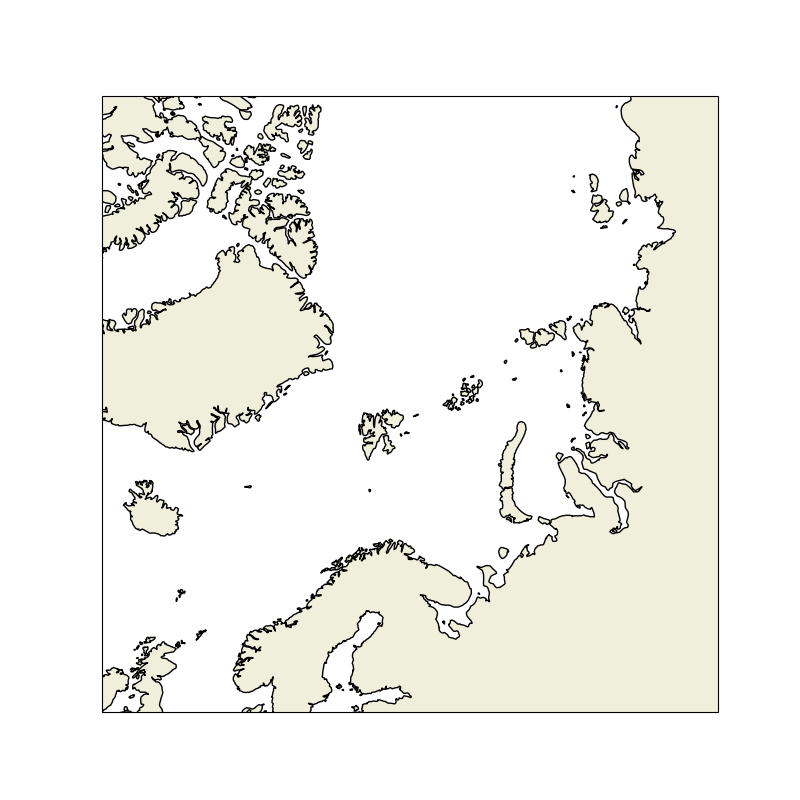

In [27]:
fig, ax = quickmap.quick_map_stere(30, 81, height = 5000, width = 5000)

In [43]:
ax.set_extent?

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extents
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      ~/mambaforge/envs/oyv/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py
Type:      method